# Exercise 0 : Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier



# Exercise 1 : Read the Dataset

In [26]:
df = pd.read_csv("heart_disease.csv")
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exercise 2 : Drop Unnamed: 0 column

In [27]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [29]:
num_rows, num_columns = df.shape
print(f"\nNumber of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 303
Number of Columns: 14


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [32]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  present
29   1    2   130       204   0    2        202      0      0.0      1      0.0  3.0   0          1
59   1    4   138       271   0    2        182      0      0.0      1      0.0  3.0   0          1
              110       239   0    2        142      1      1.2      2      1.0  7.0   1          1
          3   150       212   1    0        157      0      1.6      1      0.0  3.0   0          1
              126       218   1    0        134      0      2.2      2      1.0  6.0   1          1
                                                                                                 ..
51   1    3   100       222   0    0        143      1      1.2      2      0.0  3.0   0          1
              94        227   0    0        154      1      0.0      1      1.0  7.0   0          1
          1   125       213   0    2        125      1      1.4      1      1.0  3.0   0          1
     

In [33]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [34]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [35]:
df.duplicated().sum()

0

# Exercise 4 : Handle missing data

In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [37]:
df.drop(df[df.ca=='?'].index , inplace=True)
df.drop(df[df.thal=='?'].index , inplace=True)

In [38]:
df.shape

(297, 14)

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [40]:
# Convert specific columns to 'integer' data type
columns_to_convert = ['ca', 'thal']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df[columns_to_convert] = df[columns_to_convert].astype('int')


In [41]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
present       int64
dtype: object

# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

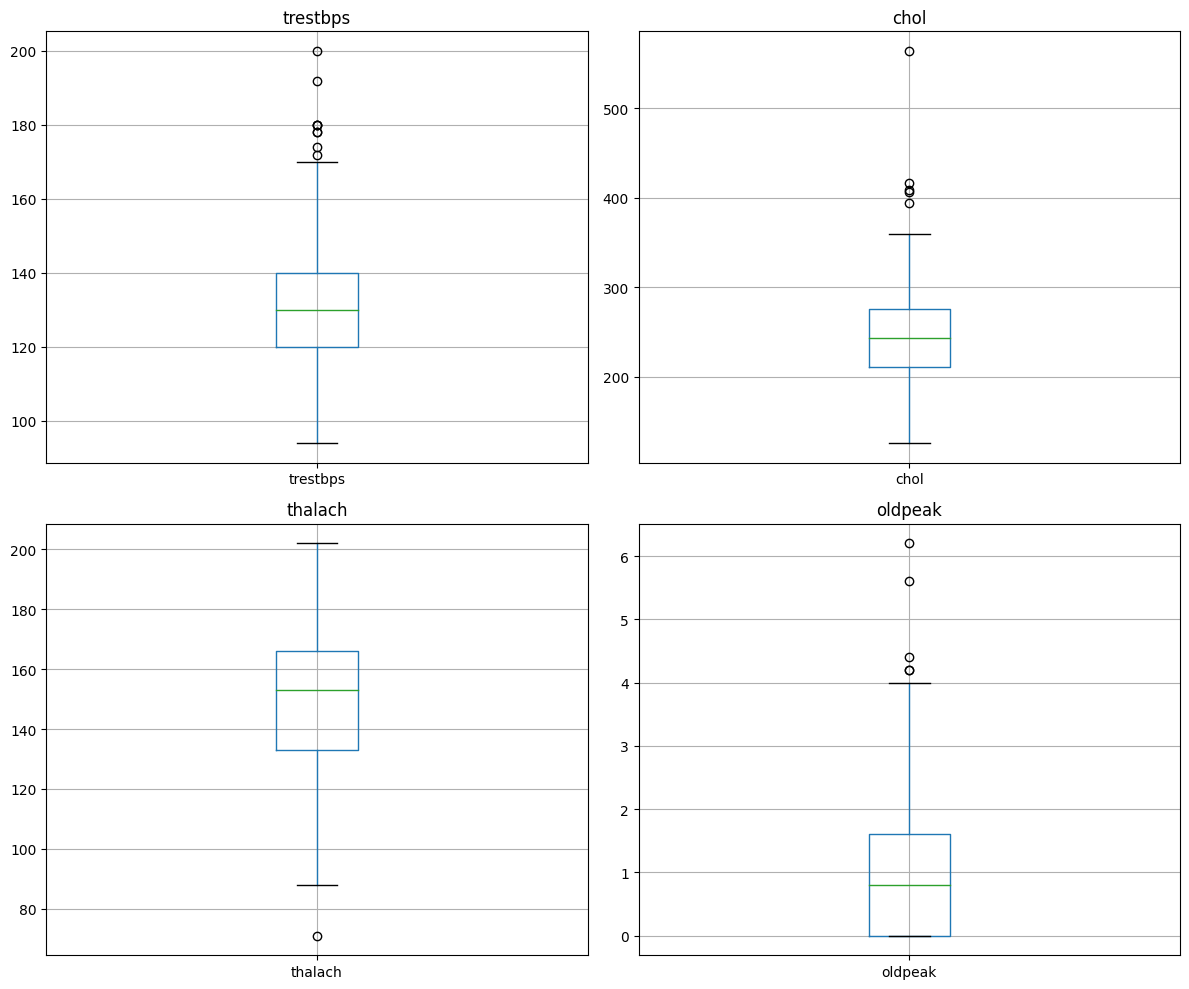

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

df.boxplot(column='trestbps', ax=axes[0, 0])
axes[0, 0].set_title('trestbps')


df.boxplot(column='chol', ax=axes[0, 1])
axes[0, 1].set_title('chol')


df.boxplot(column='thalach', ax=axes[1, 0])
axes[1, 0].set_title('thalach')


df.boxplot(column='oldpeak', ax=axes[1, 1])
axes[1, 1].set_title('oldpeak')

plt.tight_layout()
plt.show()

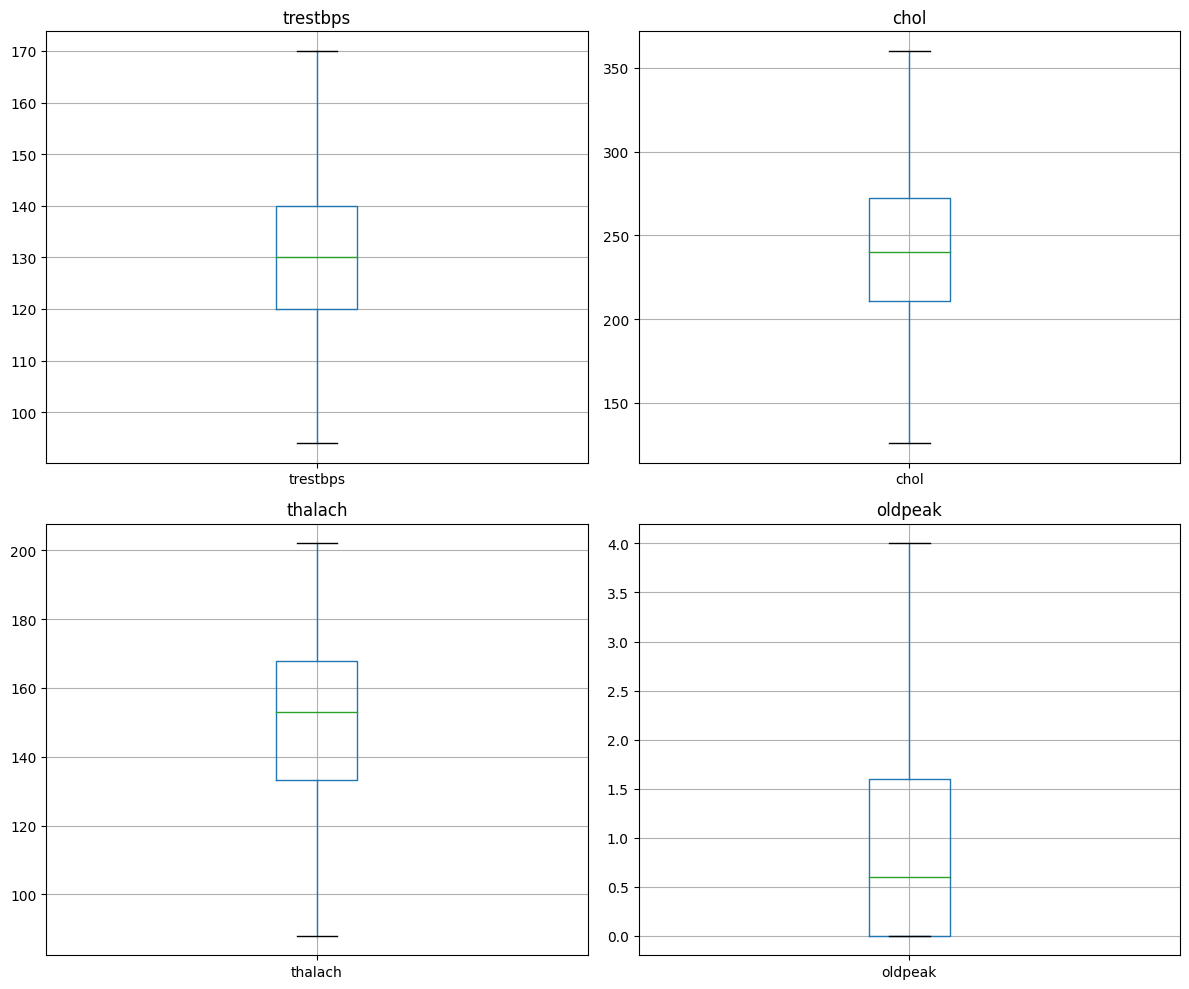

In [43]:
# Frist I write Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Here I select the Columns that need to remove outliers from
columns_to_remove_outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']

# For loop to remove outliers
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column)

# Creating a 2x2 grid of box plots before and after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

df.boxplot(column='trestbps', ax=axes[0, 0])
axes[0, 0].set_title('trestbps')


df.boxplot(column='chol', ax=axes[0, 1])
axes[0, 1].set_title('chol')


df.boxplot(column='thalach', ax=axes[1, 0])
axes[1, 0].set_title('thalach')


df.boxplot(column='oldpeak', ax=axes[1, 1])
axes[1, 1].set_title('oldpeak')

plt.tight_layout()
plt.show()


# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [44]:
corr_matrix = df.corr()

threshold = 0.6


highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)


df_filtered = df.drop(columns=highly_correlated_features)

print("Original DataFrame:\n")
df



Original DataFrame:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [45]:
print("\nDataFrame after removing highly correlated features:\n")
df_filtered


DataFrame after removing highly correlated features:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


##We can see there is no columns above the threshold is 0.6

# Exercise 8 : X and Y split, then train and test split

In [46]:
# Here I split the data to Features (X) and Target (Y)
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg','thalach','exang','oldpeak','slope' ,'ca','thal']]
Y = df['present']

# Then I split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("The X_train shape:", X_train.shape)
print("The Y_train shape:", Y_train.shape)
print('--------------------------------')
print("The X_test shape:", X_test.shape)
print("The Y_test shape:", Y_test.shape)


The X_train shape: (222, 13)
The Y_train shape: (222,)
--------------------------------
The X_test shape: (56, 13)
The Y_test shape: (56,)


# Exercise 9 : Train the model

In [47]:
#Creating a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Here I Train the model on the training data
model.fit(X_train, Y_train)



DecisionTreeClassifier(random_state=42)

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [48]:
#Here I make  predictions on training data
train_predictions = model.predict(X_train)

#Here I make predictions on testing data
test_predictions = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion matrix
conf_matrix_test = confusion_matrix(Y_test, test_predictions)

# Sensitivity and Specificity
sensitivity = conf_matrix_test[1, 1] / (conf_matrix_test[1, 0] + conf_matrix_test[1, 1])
specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

# Sensitivity/Specificity Ratio
sensitivity_specificity_ratio = sensitivity / specificity
print("Sensitivity/Specificity Ratio:", sensitivity_specificity_ratio)

# AUC-ROC
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("AUC-ROC:", roc_auc)


Training Accuracy: 1.0
Testing Accuracy: 0.8035714285714286
Sensitivity (True Positive Rate): 0.8181818181818182
Specificity (True Negative Rate): 0.7941176470588235
Sensitivity/Specificity Ratio: 1.0303030303030305
AUC-ROC: 0.806149732620321


# Exercise 11 : Find the wights and y intercept

In [49]:
# Here I create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Then I train the model on the training data
logistic_model.fit(X_train, Y_train)

# Get the coefficients (weights) and intercept
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print("Coefficients (Weights):", coefficients)
print("Intercept:", intercept)


Coefficients (Weights): [[-0.04143299  0.44171659  0.47538189  0.00998574  0.00772897 -0.23068251
   0.27354081 -0.04190957  0.30999174  0.50970367  0.09475208  1.25635683
   0.41329866]]
Intercept: [-0.14945293]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

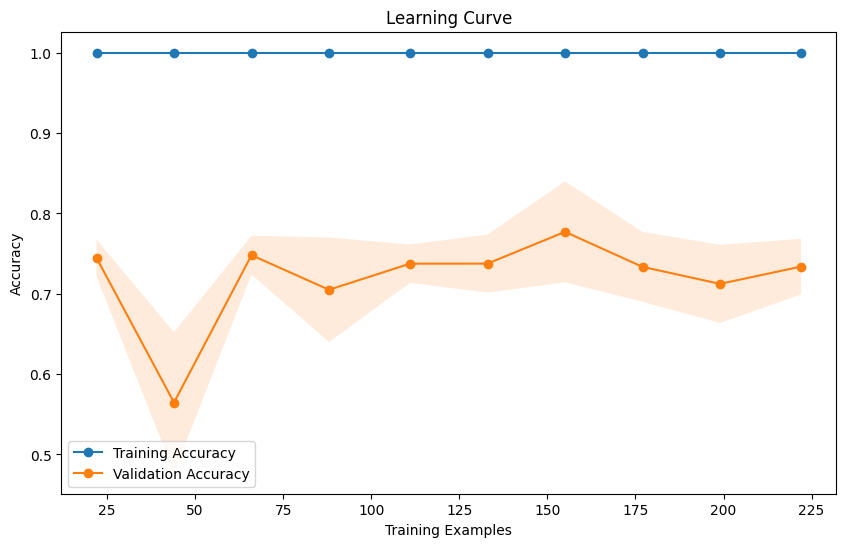

In [50]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Here I calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Then I plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##The model is Overfitting ,because there is a large gap between training and validation accuracy, and the training accuracy is significantly higher, the model may be overfitting the data.

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

In [ ]:
# Here I did function to build and evaluate models
def build_and_evaluate_model(penalty, lambda_val, X_train, Y_train, X_test, Y_test):
    if penalty == 'elasticnet':
        model = LogisticRegression(penalty=penalty, C=1/float(lambda_val), random_state=42, solver='saga', max_iter=10000, l1_ratio=0.5)
    else:
        model = LogisticRegression(penalty=penalty, C=1/float(lambda_val), random_state=42, solver='saga', max_iter=10000)

    model.fit(X_train, Y_train)

    #For making predictions
    predictions = model.predict(X_test)

    # For Evaluating the model
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

    return accuracy, precision, recall, f1, roc_auc

# results storage
results = []

# Iterate over regularization methods and lambda values
for penalty in ['l1', 'l2', 'elasticnet']:
    for lambda_val in lambda_values:
        # Build and evaluate the model
        accuracy, precision, recall, f1, roc_auc = build_and_evaluate_model(penalty, lambda_val, X_train, Y_train, X_test, Y_test)

        # Store the results
        results.append({
            'Regularization': penalty,
            'Lambda': lambda_val,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': roc_auc
        })



In [54]:
results_df = pd.DataFrame(results)
results_df

,Regularization,Lambda,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,l1,0.001,0.857143,0.818182,0.818182,0.818182,0.90107
1,l1,0.010,0.857143,0.818182,0.818182,0.818182,0.90107
2,l1,0.100,0.857143,0.818182,0.818182,0.818182,0.90107
3,l2,0.001,0.857143,0.818182,0.818182,0.818182,0.90107
4,l2,0.010,0.857143,0.818182,0.818182,0.818182,0.90107
5,l2,0.100,0.857143,0.818182,0.818182,0.818182,0.90107
6,elasticnet,0.001,0.857143,0.818182,0.818182,0.818182,0.90107
7,elasticnet,0.010,0.857143,0.818182,0.818182,0.818182,0.90107
8,elasticnet,0.100,0.857143,0.818182,0.818182,0.818182,0.90107
